In [29]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [30]:
# Name of the CSV file
csv_file_deg = 'M_Rb_sim_data_hel_F_deg.csv'
csv_file_nodeg = 'M_Rb_sim_data_hel_F_nodeg.csv'

# Lists to store the data
times = []
vals_deg = []
vals_nodeg = []
vals_mu = []

# Reading data from CSV file
with open(csv_file_deg, 'r', newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        time, val, mu_val = row
        times.append(float(time))
        vals_deg.append(float(val))
        vals_mu.append((float(mu_val)))
        
# Reading data from CSV file
with open(csv_file_nodeg, 'r', newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        time, val = row
        vals_nodeg.append(float(val))

# Calculate fixed point value
def fGL(mu):
    return 0.0964 * mu + 0.0445

vals_fGL = [fGL(mu_val) for mu_val in vals_mu]

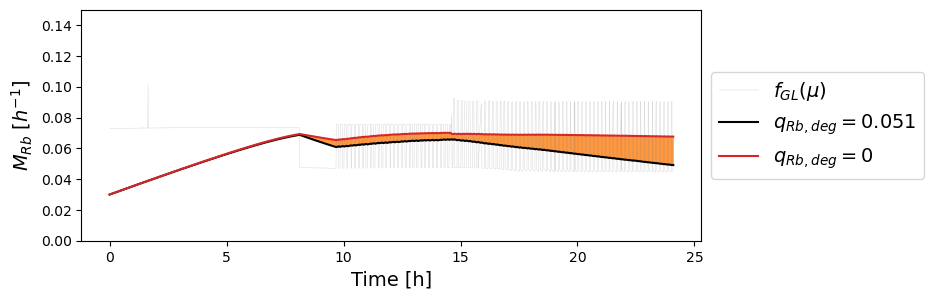

In [40]:
colors = plt.cm.viridis(np.linspace(0, 1, 3))

fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(times, vals_fGL, color='tab:gray', label=fr'$f_{{GL}}(\mu)$', linewidth=0.25, alpha=0.4)
ax.plot(times, vals_deg, color='black', label=fr'$q_{{Rb,deg}}=0.051$')
ax.plot(times, vals_nodeg, color='tab:red', label=fr'$q_{{Rb,deg}}=0$')
ax.fill_between(times, vals_deg, vals_nodeg, alpha=0.8, color='tab:orange', linewidth=0)
ax.set_xlabel(fr'Time [h]', fontsize=14)
ax.set_ylabel(fr'$M_{{Rb}}$ [$h^{{-1}}$]', fontsize=14)
plt.ylim(0, 0.15)

# Create legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

plt.savefig("M_Rb_deg_analysis.pdf", bbox_inches='tight')
plt.show()